In [193]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [194]:
visa_data_df = pd.read_csv("ABS_NOM_VISA.csv")
visa_data_df.head(2)

,DATAFLOW,MEASURE: Type of Visa,MIGRATIONTYPE: Migration Type,REGION: Region,FREQ: Frequency,TIME_PERIOD: Time Period,OBS_VALUE,UNIT_MEASURE: Unit of Measure,OBS_STATUS: Observation Status,OBS_COMMENT: Observation Comment,REPYEAREND: Reporting Year End Day
0,ABS:ABS_NOM_VISA_FY(1.0.0),2: Temporary visa - Vocational Education and T...,1: NOM arrivals,2: Victoria,A: Annual,2005,2300,PSNS: Persons,NaN,NaN,30-6: Year Ending 30 June
1,ABS:ABS_NOM_VISA_FY(1.0.0),2: Temporary visa - Vocational Education and T...,1: NOM arrivals,2: Victoria,A: Annual,2006,3630,PSNS: Persons,NaN,NaN,30-6: Year Ending 30 June


In [195]:
region = visa_data_df["REGION: Region"].unique()
region

array(['2: Victoria', '5: Western Australia', 'AUS: Australia',
       '8: Australian Capital Territory', '7: Northern Territory',
       '3: Queensland', '6: Tasmania', '1: New South Wales',
       '4: South Australia'], dtype=object)

In [196]:
#Cleaning Dataset 
#Drop all the rows from Australia

region_to_drop = 'AUS: Australia'
clean_visa_region_df = visa_data_df[visa_data_df["REGION: Region"] != region_to_drop]
clean_visa_region_df.head(2)

#Convert column "Time Period" to Date Format
df = pd.DataFrame(clean_visa_region_df)
df["date"] = pd.to_datetime(df["TIME_PERIOD: Time Period"].astype(str), format="%Y")

In [197]:
#Get Unique Types of Visa and Years into the Dataset
type_visa = clean_visa_region_df["MEASURE: Type of Visa"].unique()
year = clean_visa_region_df["TIME_PERIOD: Time Period"].unique()

In [198]:
#Remove from Type of Visas all what includes "Totals"
values_to_remove = ["1: Temporary visa - Total", "16: Total", "9: Permanent visa - Total"]

mask = df["MEASURE: Type of Visa"].isin(values_to_remove)

clean_visa_type_df = df[~mask]
clean_visa_type_df.head(1)

,DATAFLOW,MEASURE: Type of Visa,MIGRATIONTYPE: Migration Type,REGION: Region,FREQ: Frequency,TIME_PERIOD: Time Period,OBS_VALUE,UNIT_MEASURE: Unit of Measure,OBS_STATUS: Observation Status,OBS_COMMENT: Observation Comment,REPYEAREND: Reporting Year End Day,date
0,ABS:ABS_NOM_VISA_FY(1.0.0),2: Temporary visa - Vocational Education and T...,1: NOM arrivals,2: Victoria,A: Annual,2005,2300,PSNS: Persons,NaN,NaN,30-6: Year Ending 30 June,2005-01-01


In [199]:
visa_data = clean_visa_type_df.groupby(["TIME_PERIOD: Time Period", "MEASURE: Type of Visa"])["OBS_VALUE"].sum()
visa_data_df = visa_data.reset_index()



visa_data_df = visa_data_df.rename(columns={"TIME_PERIOD: Time Period": "Year" , "MEASURE: Type of Visa": "Type of Visa", "OBS_VALUE": "Value"})
visa_data_df = visa_data_df.pivot_table(index='Year', columns='Type of Visa', values='Value')
visa_data_df.head()

Type of Visa,10: Permanent visa - Family,11: Permanent visa - Skill,12: Permanent visa - Special Eligibility and humanitarian,13: New Zealand Citizen (subclass 444),14: Australian Citizen,15: Permanent visa - Other permanent visas,17: Other Visas,2: Temporary visa - Vocational Education and Training sector,3: Temporary visa - Higher education sector,4: Temporary visa - Student other,5: Temporary visa - Temporary work (skilled),6: Temporary visa - Visitor,7: Temporary visa - Working Holiday,8: Temporary visa - Other temporary visas
Year,,,,,,,,,,,,,,
2005,28440,35550,13580,37330,69260,3660,12310,7980,32760,25460,17090,35770,12930,9330
2006,30400,42750,12320,38740,72610,3640,14480,10490,42050,20560,27730,36100,17090,7590
2007,32490,47550,12410,44430,75300,3770,15960,19990,57940,25810,35850,37610,21630,6780
2008,33100,51590,9490,51680,75840,3940,11970,31420,73150,29160,44010,50000,29120,6930
2009,35060,48360,11630,46880,80430,4000,14220,53580,72070,27110,44060,42340,34310,5730


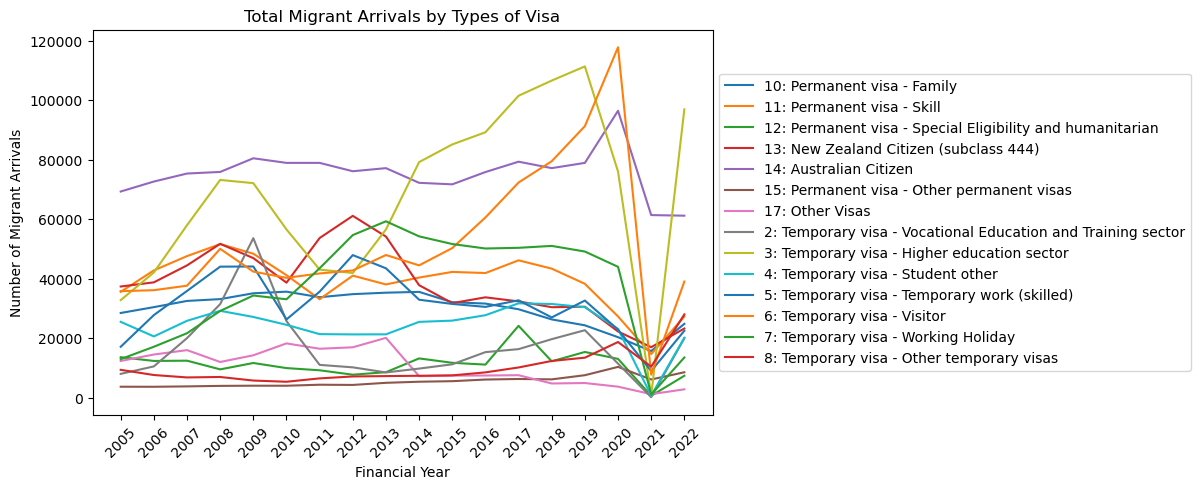

In [200]:
# Get the Total Migrant Arrivals by Types of Visa
visa_data_df.plot(kind="line", figsize=(8, 5), rot=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Total Migrant Arrivals by Types of Visa")
plt.xlabel("Financial Year")
plt.ylabel("Number of Migrant Arrivals")
plt.xticks(visa_data_df.index)
plt.show()

No clear conclusion - rather than the drop in Migrant Arrivals during Covid Time

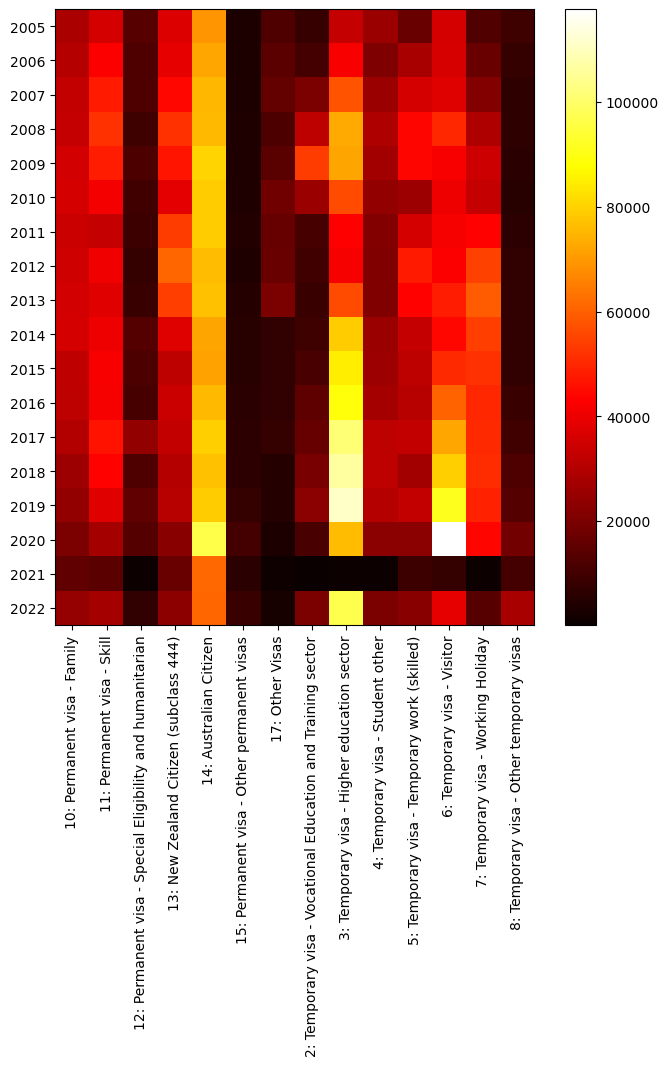

In [201]:
#Heat Map 
plt.figure(figsize=(8, 8))
plt.imshow(visa_data_df, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(visa_data_df.columns)), visa_data_df.columns, rotation = 90)
plt.yticks(range(len(visa_data_df.index)), visa_data_df.index)
plt.show()

In [202]:
visa_data_region = clean_visa_type_df.groupby(["TIME_PERIOD: Time Period", "REGION: Region", "MEASURE: Type of Visa"])["OBS_VALUE"].sum()
visa_data_region_df = visa_data_region.reset_index()
visa_data_region_df = visa_data_region_df.rename(columns={"TIME_PERIOD: Time Period": "Year" , "REGION: Region": "Region", "MEASURE: Type of Visa": "Type of Visa", "OBS_VALUE": "Value"})
visa_data_region_df= visa_data_region_df.pivot_table(index={'Region','Year'}, columns={'Type of Visa'}, values='Value')
visa_data_region_df

Type of Visa                          10: Permanent visa - Family  \
Region                          Year                                
1: New South Wales              2005                        12370   
                                2006                        13250   
                                2007                        13530   
                                2008                        13810   
                                2009                        14230   
...                                                           ...   
8: Australian Capital Territory 2018                          460   
                                2019                          370   
                                2020                          330   
                                2021                          250   
                                2022                          440   

Type of Visa                          11: Permanent visa - Skill  \
Region                          Year                               
1: New South Wales              2005                       11690   
                                2006                       12410   
                                2007                       12890   
                                2008                       13530   
                                2009                       12730   
...                                                          ...   
8: Australian Capital Territory 2018                         670   
                                2019                         590   
                                2020                         400   
                                2021                         220   
                                2022                         500   

Type of Visa                          12: Permanent visa - Special Eligibility and humanitarian  \
Region                          Year                                                              
1: New South Wales              2005                                               4420           
                                2006                                               4410           
                                2007                                               4200           
                                2008                                               2950           
                                2009                                               4080           
...                                                                                 ...           
8: Australian Capital Territory 2018                                                190           
                                2019                                                210           
                                2020                                                170           
                                2021                                                 10           
                                2022                                                100           

Type of Visa                          13: New Zealand Citizen (subclass 444)  \
Region                          Year                                           
1: New South Wales              2005                                   11140   
                                2006                                   10870   
                                2007                                   11200   
                                2008                                   11370   
                                2009                                   10090   
...                                                                      ...   
8: Australian Capital Territory 2018                                     320   
                                2019                                     230   
                                2020                                     180   
                                2021             

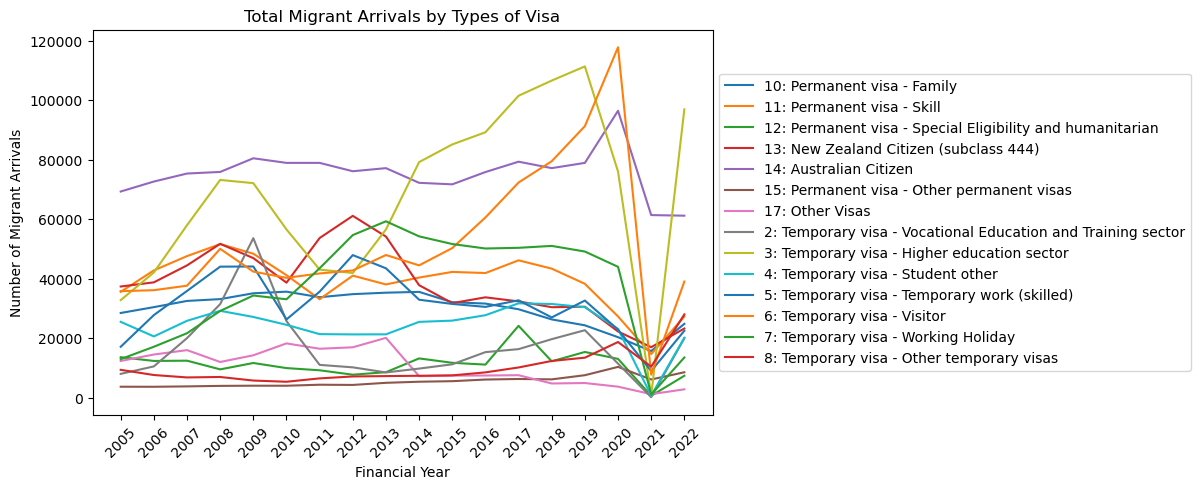

In [203]:
# Get the Total Migrant Arrivals by Types of Visa
visa_data_df.plot(kind="line", figsize=(8, 5), rot=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Total Migrant Arrivals by Types of Visa")
plt.xlabel("Financial Year")
plt.ylabel("Number of Migrant Arrivals")
plt.xticks(visa_data_df.index)
plt.show()

In [233]:
visa_data = clean_visa_type_df.groupby(["TIME_PERIOD: Time Period", "MEASURE: Type of Visa"])["OBS_VALUE"].sum()
visa_data_df = visa_data.reset_index()



visa_data_df = visa_data_df.rename(columns={"TIME_PERIOD: Time Period": "Year" , "MEASURE: Type of Visa": "Type of Visa", "OBS_VALUE": "Value"})
visa_data_df = visa_data_df.pivot_table(index='Year', columns='Type of Visa', values='Value')

visa_data_df =  visa_data_df.reset_index()
visa_data_df = pd.DataFrame(visa_data_df)

In [208]:
work_data_df = pd.read_csv("Total Hours Work.csv")
work_data_df.reset_index

<bound method DataFrame.reset_index of            Unnamed: 0 Monthly hours worked in all jobs ;  Persons ;  \
0                Unit                                     000 Hours   
1         Series Type                                         Trend   
2           Data Type                                          FLOW   
3           Frequency                                         Month   
4    Collection Month                                             1   
..                ...                                           ...   
541          Nov-2022                                     1887573.6   
542          Dec-2022                                     1893983.9   
543          Jan-2023                                     1899823.8   
544          Feb-2023                                     1905045.6   
545          Mar-2023                                     1909804.1   

    Monthly hours worked in all jobs ;  Persons ;.1  \
0                                         000 Hours  

In [209]:
summary_work = work_data_df.loc[:,['Unnamed: 0', 'Monthly hours worked in all jobs ;  Persons ;.1', '> Monthly hours worked in all jobs (employed full-time) ;  Persons ;.1', '> Monthly hours worked in all jobs (employed part-time) ;  Persons ;.1']]
summary_work = summary_work.rename(columns={'Unnamed: 0': "Date", 'Monthly hours worked in all jobs ;  Persons ;.1': "Total Hours Worked", '> Monthly hours worked in all jobs (employed full-time) ;  Persons ;.1': "Total Hours Worked (full-time)", '> Monthly hours worked in all jobs (employed part-time) ;  Persons ;.1': "Total Hours Worked (part-time)"})
summary_work.head(12)

,Date,Total Hours Worked,Total Hours Worked (full-time),Total Hours Worked (part-time)
0,Unit,000 Hours,000 Hours,000 Hours
1,Series Type,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted
2,Data Type,FLOW,FLOW,FLOW
3,Frequency,Month,Month,Month
4,Collection Month,1,1,1
5,Series Start,Jul-1978,Jul-1978,Jul-1978
6,Series End,Mar-2023,Mar-2023,Mar-2023
7,No. Obs,537,537,537
8,Series ID,A84426277X,A84426278A,A84426279C
9,Jul-1978,907752.1,847386.5,60365.6


In [210]:
#Check totals hours worked are full-time + part-time hours
summary_work_check = pd.to_numeric(summary_work.iloc[9:]["Total Hours Worked (full-time)"]) + pd.to_numeric(summary_work.iloc[9:]["Total Hours Worked (part-time)"])

In [211]:
#Create a new column for the year
summary_work["Year"] = summary_work.iloc[9:]["Date"].apply(lambda x: str(x)[-4:])

In [212]:
#Group by year and get total of total hours worked

#Firstly, remove the first rows that are not numeric values
work_df = summary_work.drop(index=range(9))

In [213]:
#Convert columns to numberic dtype
work_df["Total Hours Worked"] = work_df["Total Hours Worked"].astype(float)
work_df["Total Hours Worked (full-time)"] = work_df["Total Hours Worked (full-time)"].astype(float)
work_df["Total Hours Worked (part-time)"] = work_df["Total Hours Worked (part-time)"].astype(float)

In [261]:
hrs_worked_year = work_df.groupby("Year")["Total Hours Worked"].sum()
hrs_worked_year1 = hrs_worked_year.reset_index(name="Total Hours Worked per Year")

hrs_worked_year = work_df.groupby("Year")["Total Hours Worked (full-time)"].sum()
hrs_worked_year2= hrs_worked_year.reset_index(name="Total Hours Worked (full-time) per Year")

hrs_worked_year = work_df.groupby("Year")["Total Hours Worked (part-time)"].sum()
hrs_worked_year3 = hrs_worked_year.reset_index(name="Total Hours Worked (part-time) per Year")

#Create the Table with the results(merge)
result = [hrs_worked_year1, hrs_worked_year2, hrs_worked_year3]

hrs_worked_year= result[0]

for result in result[1:]:
    hrs_worked_year = pd.merge(hrs_worked_year, result, on="Year")

hrs_worked_year.head()

,Year,Total Hours Worked per Year,Total Hours Worked (full-time) per Year,Total Hours Worked (part-time) per Year
0,1978,5463527.9,5100974.5,362553.4
1,1979,11139978.3,10401977.2,738001.3
2,1980,11446552.3,10674476.6,772075.7
3,1981,11592711.8,10791583.9,801128.0
4,1982,11452493.1,10637197.1,815296.3


In [263]:
hrs_worked_year["Year"] = hrs_worked_year["Year"].astype('int64')
hrs_worked_year["Total Hours Worked per Year"] = hrs_worked_year["Total Hours Worked per Year"].astype('int64')
hrs_worked_year["Total Hours Worked (full-time) per Year"] = hrs_worked_year["Total Hours Worked (full-time) per Year"].astype('int64')
hrs_worked_year["Total Hours Worked (part-time) per Year"] = hrs_worked_year["Total Hours Worked (part-time) per Year"].astype('int64')

In [264]:
#Show only results from 2012 to 2022
hrs_worked_year= hrs_worked_year.loc[(hrs_worked_year["Year"] >= 2005) & (hrs_worked_year["Year"] < 2023)]
hrs_worked_year

,Year,Total Hours Worked per Year,Total Hours Worked (full-time) per Year,Total Hours Worked (part-time) per Year
27,2005,17021442,14659455,2361986
28,2006,17343047,14916017,2427029
29,2007,17871272,15389004,2482267
30,2008,18382027,15805679,2576348
31,2009,18206713,15551553,2655159
32,2010,18635690,15855299,2780390
33,2011,18977659,16168482,2809177
34,2012,19129140,16289912,2839227
35,2013,19287589,16334434,2953155
36,2014,19325324,16290604,3034720


In [265]:
visa_work_merged = pd.merge(visa_data_df, hrs_worked_year, on=["Year"], how='outer')
visa_work_merged

,Year,10: Permanent visa - Family,11: Permanent visa - Skill,12: Permanent visa - Special Eligibility and humanitarian,13: New Zealand Citizen (subclass 444),14: Australian Citizen,15: Permanent visa - Other permanent visas,17: Other Visas,2: Temporary visa - Vocational Education and Training sector,3: Temporary visa - Higher education sector,4: Temporary visa - Student other,5: Temporary visa - Temporary work (skilled),6: Temporary visa - Visitor,7: Temporary visa - Working Holiday,8: Temporary visa - Other temporary visas,Total Hours Worked per Year,Total Hours Worked (full-time) per Year,Total Hours Worked (part-time) per Year
0,2005,28440,35550,13580,37330,69260,3660,12310,7980,32760,25460,17090,35770,12930,9330,17021442,14659455,2361986
1,2006,30400,42750,12320,38740,72610,3640,14480,10490,42050,20560,27730,36100,17090,7590,17343047,14916017,2427029
2,2007,32490,47550,12410,44430,75300,3770,15960,19990,57940,25810,35850,37610,21630,6780,17871272,15389004,2482267
3,2008,33100,51590,9490,51680,75840,3940,11970,31420,73150,29160,44010,50000,29120,6930,18382027,15805679,2576348
4,2009,35060,48360,11630,46880,80430,4000,14220,53580,72070,27110,44060,42340,34310,5730,18206713,15551553,2655159
5,2010,35600,41140,9920,38630,78880,3990,18220,25710,56510,24460,26270,40250,33040,5330,18635690,15855299,2780390
6,2011,33740,33060,9180,53630,78880,4330,16420,11000,43020,21330,35600,41720,43470,6460,18977659,16168482,2809177
7,2012,34770,40990,7700,61080,76070,4260,16910,10170,41880,21240,47890,42730,54620,7110,19129140,16289912,2839227
8,2013,35260,38030,8540,54120,77110,4970,20070,8460,56500,21260,43460,47920,59250,7230,19287589,16334434,2953155
9,2014,35530,40340,13170,37780,72180,5340,7200,9750,79140,25450,32900,44440,54190,7340,19325324,16290604,3034720


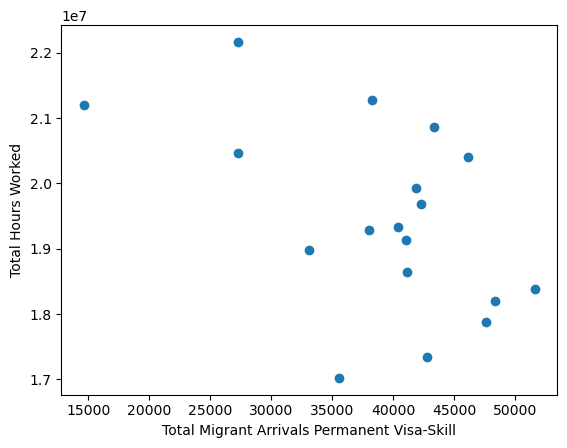

In [270]:
plt.scatter(visa_work_merged["11: Permanent visa - Skill"], visa_work_merged["Total Hours Worked per Year"])
plt.xlabel("Total Migrant Arrivals Permanent Visa-Skill")
plt.ylabel("Total Hours Worked")
plt.show()

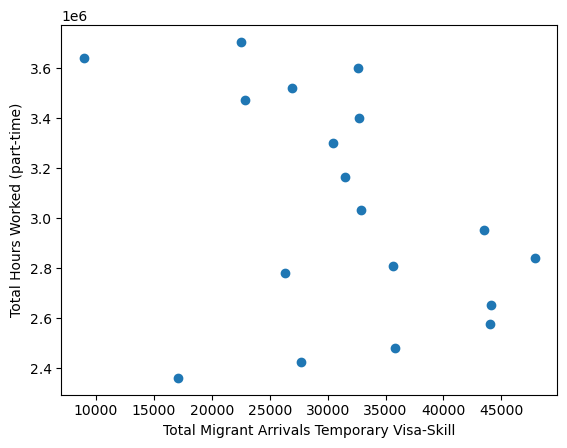

In [274]:
plt.scatter(visa_work_merged["5: Temporary visa - Temporary work (skilled)"], visa_work_merged["Total Hours Worked (part-time) per Year"])
plt.xlabel("Total Migrant Arrivals Temporary Visa-Skill")
plt.ylabel("Total Hours Worked (part-time)")
plt.show()